<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [ ]:
#ваш код здесь
dst= pd.read_csv('D:\idi\PROJECT-1\DATA\dst-3.0_16_1_hh_database.csv' , sep=';')
dst.shape


(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [ ]:
print(dst.head(1))

                                 Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   

  Последнее/нынешнее место работы Последняя/нынешняя должность  \
0         МАОУ "СОШ № 1 г.Немана"      Системный администратор   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   

                             Авто  
0  Имеется собственный автомобиль  


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [ ]:
dst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [ ]:
dst.describe()

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 2014 Тюменский Государствен...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [ ]:
get_education = lambda s:( # обьявляем lambda-функцию с параметром s-строка
    lambda parts:# выделяем внутренюю Lambda-функцию с параметром parts
        (parts[0] + ' ' + parts[1])  #если условие ниже верно , то обьединяем 2 слова
        if parts[1] in ['высшее', 'специальное'] # проверяем 2 слово на нужные значения
        else parts[0])(s.lower().split()[:2]) # применяем внутреннюю lambda-функцию к первым 2 словам с нижним регистром 
    
dst['Образование']= dst['Образование и ВУЗ'].apply(get_education)
dst= dst.drop('Образование и ВУЗ',axis=1)
print(dst['Образование'].unique())
print(dst[dst['Образование']=='среднее'].shape[0])

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']
559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [ ]:
#разделяем строку по  запятым и берем первое значение 
dst['Пол']= dst['Пол, возраст'].apply(lambda x: 'М' if x.split(',')[0]=='Мужчина ' else 'Ж')
# разделяем строку по запятым и берем оттуда второе значение(возраст)
dst['Возраст'] =  dst['Пол, возраст'].apply(lambda y: int(y.split(',')[1].split()[0]))

#получаем информацию  о проценте женских резюме
print(round((dst['Пол'].value_counts(normalize=True)['Ж'] * 100) , 2))
# выводим средний возраст соискателей 
print(round(dst['Возраст'].mean() ,1))

#удаляем столбез "пол,возраст" после проверки  
dst.drop('Пол, возраст', axis=1, inplace=True)



19.07
32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [ ]:
def get_work_skill(x):
    """ функция принимает на вход данные обопыте работы и возращает информацию
    о том, сколько месяцев соискатель работал
    либо NaN если соискатель не указал опыт работы
    """

    if x is np.nan or x == 'Не указано':
        return np.nan
    result=0
    # нужная информация содержится только в первых  6 словах 
    work_exp= x.split()[:6]
    #перебераем все 6 слов
    for i , word in enumerate(work_exp):
        if 'год' in word or 'лет' in word:
            result +=int(work_exp[i-1])*12
        elif 'месяц' in word :
            result += int(work_exp[i-1])
    return result

#создаем новый признак "Опыт работы (месяц)"
dst['Опыт работы (месяц)'] =dst['Опыт работы'].apply(get_work_skill).astype('Int16')
dst['Опыт работы (месяц)'].median()
dst=dst.drop('Опыт работы', axis=1)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [ ]:
#ваш код здесь
def get_city(s):
    #функция возращает категорию к которой пренадлежит город
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 
                      'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
                      'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    city= s.split(',')[0].strip()
    if city == 'Москва' or city == 'Санкт-Петербург':
        result=city
    elif city in million_cities:
        result= 'город-миллионник'
    else:
        result='другие'
    return result

#функция возвращает true or false в зависимости от готовности соискателя переехать
def get_ready_to_move(s):
    if 'не готов к переезду' in s or 'не готова к переезду' in s :
        return False
    else:
        return True
# еще один вариант написания кода ниже 
# dst['Готовность к переезду']= dst['Город, переезд, командировки'].apply(lambda s: any(c in str(s) for c in [', готов к переезду', ', готова к переезду', 'хочу переехать']))

def get_ready_for_bisiness_trips(s):
    #функция возращает true or false в зависимости от готовности к командировкам
    list_not_ready= ['не готов к командировкам','не готова к командировкам','не готов к редким командировкам','не готова к редким командировкам']
    for phrase in list_not_ready:
        if phrase in s:
            return False
    return True
        
dst['Город']= dst['Город, переезд, командировки'].apply(get_city)
dst['Готовность к переезду']= dst['Город, переезд, командировки'].apply(get_ready_to_move)
dst['Готовность к командировкам']= dst['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)  
dst= dst.drop('Город, переезд, командировки', axis=1)

prosent_spb= round(dst['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100 )
display(prosent_spb)   
mask1= dst['Готовность к переезду']== True
mask2=dst['Готовность к командировкам'] == True
display( round(dst[mask1 & mask2].shape[0]/dst.shape[0] *100))


11

32

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [ ]:
#ваш код здесь
#для каждого типа занятости создаем новый столбец со значениями True,  False
imployment_rate =['полная занятость', 'частичная занятость', 'проектная работа','стажировка','волонтерство']
for item in imployment_rate:
    dst[item]= dst['Занятость'].apply(lambda x: item in x)
#для каждогj графика работы создаем новый столбец со значениями True,  False
work_schedule= ['полный день', 'удаленная работа', 'вахтовый метод','гибкий график', 'сменный график']
for item in work_schedule:
    dst[item]= dst['График'].apply(lambda x: item in x)

dst= dst.drop(['Занятость','График'], axis=1)

print(dst[dst['проектная работа']& dst['волонтерство']].shape[0])
print(dst[dst['вахтовый метод']& dst['гибкий график']].shape[0])

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [ ]:
# Функция для извлечения числового значения зарплаты из строки
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])  # Разбиваем строку по пробелу и берем первый элемент
    return salary

# Функция для определения валюты зарплаты с конвертацией в ISO-код
def get_salary_currency(arg):
    # Словарь для конвертации валют
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    # Извлекаем валюту, удаляя возможные точки
    curr = arg.split(' ')[1].replace('.', '')
    # Специальная обработка для рублей
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]

# Импортируем DataFrame с курсами валют из CSV-файла
exchange_rates_data = pd.read_csv('D:\idi\PROJECT-1\DATA\ExchangeRates.csv', sep=',')
# Преобразуем столбец date в формат datetime и оставляем только дату (без времени)
exchange_rates_data['date'] = pd.to_datetime(exchange_rates_data['date'], dayfirst=True).dt.date
# Аналогично преобразуем столбец с датами обновления резюме в основном DataFrame
dst['Обновление резюме'] = pd.to_datetime(dst['Обновление резюме'], dayfirst=True).dt.date

# Обработка дат в основном DataFrame
dst['Обновление резюме'] = pd.to_datetime(dst['Обновление резюме'], dayfirst=True).dt.date

# Создание временных столбцов с числовым значением зарплаты и валютой
dst['ЗП (tmp)'] = dst['ЗП'].apply(get_salary_num)
dst['Курс (tmp)'] = dst['ЗП'].apply(get_salary_currency)

# Объединение с данными о курсах валют
merged = dst.merge(
    exchange_rates_data, 
    left_on=['Курс (tmp)', 'Обновление резюме'],  # Ключи из основного DataFrame
    right_on=['currency', 'date'],               # Ключи из данных о курсах
    how='left'                                   # Left join для сохранения всех записей
)

# Заполнение пропущенных значений
merged['close'] = merged['close'].fillna(1)          # Курс по умолчанию 1
merged['proportion'] = merged['proportion'].fillna(1)  # Пропорция по умолчанию 1

# Расчет зарплаты в рублях
dst['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']

# Удаление временных столбцов
dst = dst.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1)

# Вывод медианной зарплаты в тысячах рублей (округленной)
print(round(dst['ЗП (руб)'].median()/1000))

C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\2354670323.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange_rates_data['date'] = pd.to_datetime(exchange_rates_data['date'], dayfirst=True).dt.date


59


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

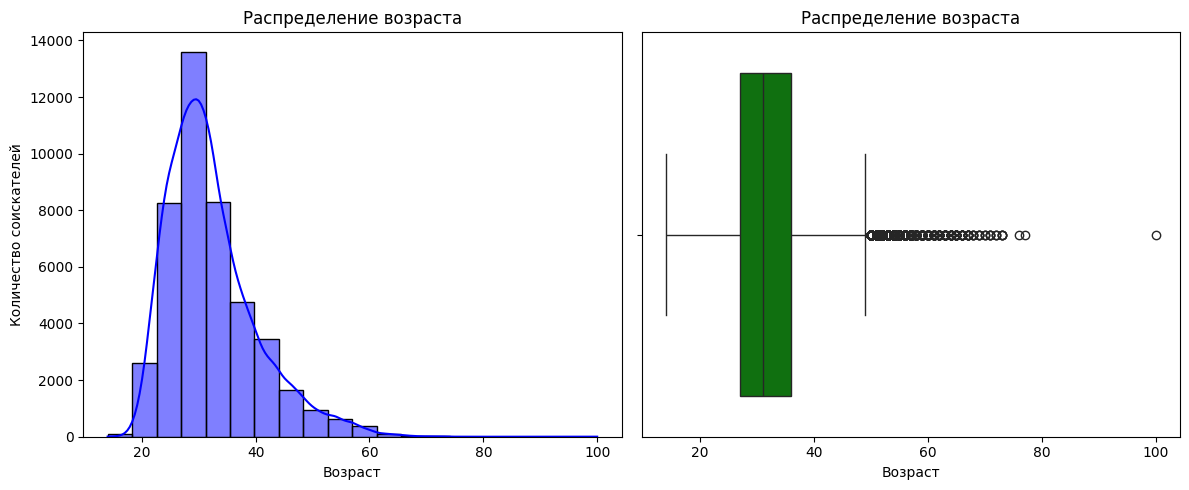

In [ ]:

fig, (axes1, axes2 )= plt.subplots(1,2, figsize=(12, 5))

sns.histplot(
    dst,
    x='Возраст',
    bins=20,
    kde=True,
    ax=axes1,
    color='blue',

)
axes1.set_title('Распределение возраста')
axes1.set_xlabel('Возраст')
axes1.set_ylabel('Количество соискателей')

sns.boxplot(
    data=dst,
    x='Возраст',
    ax=axes2,
    color='green',
)

axes2.set_title('Распределение возраста')
axes2.set_xlabel('Возраст')

plt.tight_layout()
plt.show()

In [ ]:
fig = px.histogram(
    data_frame=dst,
    x='Возраст',
    title='Распределение возраста соискателей',
    histnorm='percent',
    width=800,
    marginal='box',
)
fig.show()

fig.write_html('D:/idi/PROJECT-1/images/dist_age.html')

**Выводы по графику:**
1. Мода распределения равна 30 годам
2. Минимальный возраст 14, максимальный возраст 77(если не считать выброс)
3. Чаще всего встречаются люди в возрасте 25-35 лет
4. Есть выбросы (соискатель в возрасте 100 лет и 14 лет)
5. Аномалии: соискатели в возрасте старше 60 лет (возрастные сотрудники), соискатели младше 20 лет(студенты, без  опыта)


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

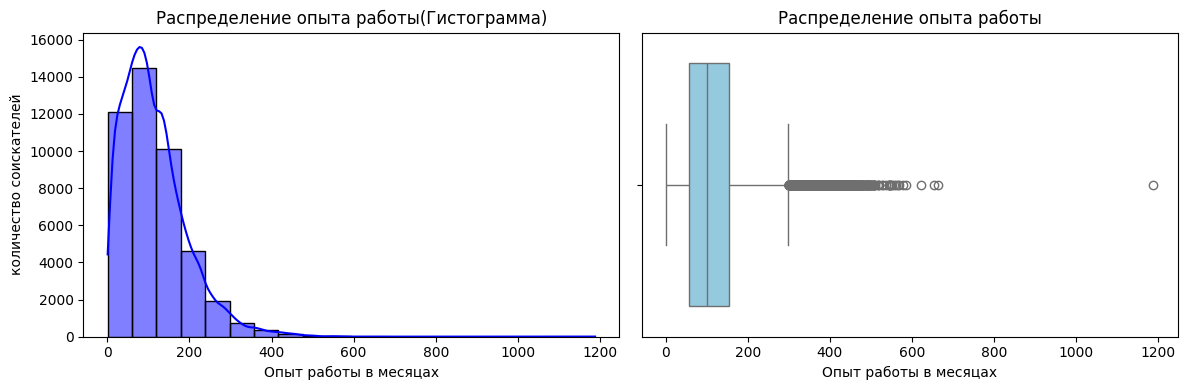

In [ ]:
# ваш код здесь
fig , (ax1,ax2)= plt.subplots( 1,2 , figsize=(12,4))
sns.histplot(
    dst,
    x='Опыт работы (месяц)',
    color='blue',
    bins=20,
    kde=True,
    ax=ax1
)
ax1.set_title('Распределение опыта работы(Гистограмма)')
ax1.set_xlabel('Опыт работы в месяцах')
ax1.set_ylabel('количество соискателей')

sns.boxplot(
    dst,
    x='Опыт работы (месяц)',
    color='skyblue',
    ax=ax2
)
ax2.set_title('Распределение опыта работы')
ax2.set_xlabel('Опыт работы в месяцах')


plt.tight_layout()
plt.show()

In [ ]:
fig = px.histogram(
    data_frame=dst,
    x='Опыт работы (месяц)',
    title='Распределение опыта работы соискателей',
    histnorm='percent',
    width=800,
    marginal='box',
)
fig.show()
fig.write_html('D:/idi/PROJECT-1/images/dist_skill.html')

**Выводы по распределению опыта работы соискателей** 
1. Мода распределения равна 80-84 месяца 
2.Предельные значения  1 месяцев-минимальное,   и 1188 месяцев максимальное 
3. Распределение имееет выброс - 1188 месяцев 
4. Основная часть соискателей имеет опыт работы в пределаз 65-150месяцев 


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [ ]:
# ваш код здесь
fig = px.histogram(
    data_frame=dst,
    x='ЗП (руб)',
    title='Распределение заработной планы соискателей',
    histnorm='percent',
    width=1000,
    marginal='box',
)
fig.show()
fig.write_html('D:/idi/PROJECT-1/images/dist_salary_1.html')

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь
# Фильтруем данные: оставляем только записи с зарплатой меньше 1 млн рублей
# и группируем по образованию, вычисляя медианную зарплату для каждой группы
median_salary = dst[dst['ЗП (руб)'] < 1e6].groupby('Образование', as_index=False)['ЗП (руб)'].median()

# Создаем интерактивную столбчатую диаграмму с помощью plotly.express
fig = px.bar(
    data_frame=median_salary, 
    x='Образование',
    y='ЗП (руб)',
    title='Распределение уровня образования к ЗП соискателей',
    height=400,
    width=800,
)
fig.show()
fig.write_html('D:/idi/PROJECT-1/images/dist_level.html')

**Выводы о уровне образования к ЗП соискателей:**
1. Чем выше уровень образования, тем выше соискатель запрашивает ЗП
2. Люди с средним и среднем специальным в среднем запрашивают одинаковые ЗП
3. При рассмотрении данных о зависимости образованик к запрашиваемой ЗП,можно наблюдать тенденцию, поэтому этот признак важен при прогнозировании ЗП

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь
box_data= dst[dst['ЗП (руб)']< 1e6]
fig= px.box(
    box_data,
    x='ЗП (руб)',
    color='Город',
    height=500,
    width=1000,
    range_x=[0, 1e6],
    title='Распределение желаемой З/П от города'
)
fig.show()
fig.write_html('D:/idi/PROJECT-1/images/dist_salary_2.html')

**Выводы о распределении желаемой заработной платы от города:**
1. Наиболее большой показатель з/п зафиксирован в категории городов "Другие"
2. Города-миллионники показывают более умеренные ожидания, что отражает региональные различия в экономике и уровне жизни.
3. Категория "другие" (вероятно, малые города) и города миллионники имеют самые низкие запросы по зарплате, что коррелирует с более низкими ценами и доходами в таких регионах.
4. При рассмотрении данных можем видеть, что 25 квантиль З/П в Москве соответствует 75 квантилю других городов,  что говорит о большом разбросе заработных ожиданий. По этой причине этот признак важен для прогнозирования З/П

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
# ваш код здесь
bar_data = dst.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду'
)
fig.show()
fig.write_html('D:/idi/PROJECT-1/images/dist_salary_3.html')

**Выводы по зависимости З/П от готовности к переезду и командировкам** 
1. Готовность к командировкам существенно увеличивает медианную зарплату:

+ У работников, согласных на командировки (True), зарплата значительно выше (≈60–70 тыс. руб.), чем у тех, кто не готов (≈20–30 тыс. руб.).

2. Готовность к переезду также повышает зарплату, но менее выраженно:

+ Те, кто готов переезжать (True), получают в среднем больше (≈40–50 тыс. руб.), чем неготовые (≈30–40 тыс. руб.).

Переезд чаще ассоциируется с карьерными возможностями в крупных городах или международных компаниях, но требует больших затрат времени и ресурсов от работника.

3. Комбинация факторов:

+ Максимальная зарплата наблюдается у тех, кто готов и к командировкам, и к переезду.

+ Минимальные доходы — у работников, отвергающих оба условия (False по обоим параметрам).

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Text(0.5, 1.0, 'Тепловая карта уровня ожидаемой ЗП')

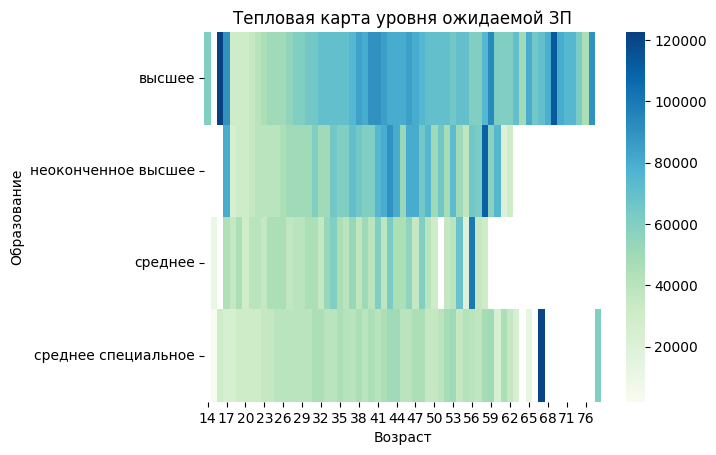

In [ ]:
# ваш код здесь
pivot= dst.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование',
    aggfunc='median'
)

heatmap=sns.heatmap(pivot, cmap='GnBu')
heatmap.set_title('Тепловая карта уровня ожидаемой ЗП')

**Выводы по тепловой карте уровня ожидаемой ЗП**

1. Соискатели с высшим образованием ожидают зп выше чем соискатели с образованием ниже неоконченного высшего
2. Чем старше соискатели тем выше требования к ЗП 
3. Зарплатный ожидания у соискателей  с образованием среднее и среднее специальное меняются с малой интенсивностью или не меняются вовсе 
4. Пиковые значения в заработной плате есть у клиентов с высшим образованием(возрат до 18лет) и у среднеспециального (68 лет), что может считаться выбросом или ошибкой в резюме


8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\1251978986.py:13: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



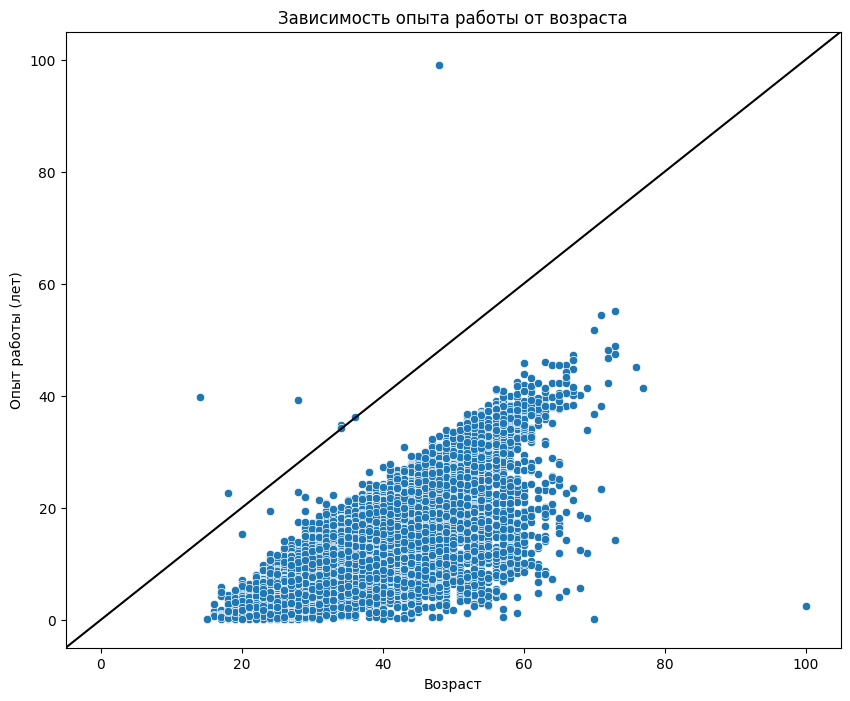

In [ ]:
# ваш код здесь
exp_in_year = round((dst['Опыт работы (месяц)']/12),1)
fig= plt.figure(figsize=(10,8))
scatterplot=sns.scatterplot(
    dst,
    y=exp_in_year,
    x='Возраст',
    
)
scatterplot.axline((0,0),(100,100), color='k')
scatterplot.set_title('Зависимость опыта работы от возраста')
scatterplot.set_ylabel('Опыт работы (лет)')
fig.show()

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# Преобразуем данные из широкого формата в длинный
dst_long = dst.melt(
    id_vars=['ЗП (руб)'], 
    value_vars=['полный день', 'удаленная работа', 'вахтовый метод', 'сменный график'],
    var_name='Тип графика', 
    value_name='Флаг'
)

# Фильтруем только активные категории (где Флаг == 1)
dst_long = dst_long[dst_long['Флаг'] == 1]

# Группируем по типу графика и вычисляем медианную зарплату
bar_data = dst_long.groupby('Тип графика', as_index=False)['ЗП (руб)'].median()

# Строим столбчатую диаграмму
fig = px.bar(
    bar_data,
    x='Тип графика',
    y='ЗП (руб)',
    color='Тип графика',
    title='Медианная зарплата по типам графика работы',
    height=500,
    width=1000,
    labels={'ЗП (руб)': 'Медианная ЗП (руб)'}  # Улучшаем подпись оси Y
)

fig.show()
fig.write_html('D:/idi/PROJECT-1/images/dist_salary_4.html')

**Выводы по медианной зарплате по типам графика работы:****
1. На графике видно, что ЗП у людей со сменным графиком и вахтовым методом меньше чем у соискателей с полным днем и удаленной работой
2. Соискатели с полным днем и удаленной работой имеют одинаковые показатели по сумме ЗП, что моэет говорить о том что кдаленная работа имеет высокий спрос на специалистов в определенных сферах (IT, маркетинг, дизайн), где работодатели готовы платить больше за гибкость


In [ ]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

box_data = dst[dst['ЗП (руб)'] < 1e6]

# Создаем подграфики: 1 строка, 2 столбца
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(
                        'Распределение опыта работы по полу',
                        'Распределение желаемой ЗП по полу'
                    ))

# График 1: Опыт работы vs Пол
fig1 = px.box(
    dst,
    x='Опыт работы (месяц)',
    y='Пол',
    color='Пол',
    orientation='h'  # Горизонтальная ориентация
)
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# График 2: ЗП vs Пол
fig2 = px.box(
    box_data,
    x='ЗП (руб)',
    y='Пол',
    color='Пол',
    orientation='h',
    range_x=[0, 1e6]
)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Настройка общего вида
fig.update_layout(
    height=600,
    width=1200,
    showlegend=False,  # Убираем дублирование легенды
    title_text='Анализ зависимости опыта работы и ЗП от пола',
    xaxis1_title='Опыт работы (месяцы)',
    xaxis2_title='Желаемая ЗП (руб)',
    yaxis1_title='Пол',
    yaxis2_title='Пол'
)

# Выравниваем диапазоны осей Y для единообразия
fig.update_yaxes(matches='y')
fig.show()
fig.write_html('D:/idi/PROJECT-1/images/figs_1.html')

**Выводы по распределению ЗП от пола соискателя:**\
 Мужчины соискатели запрашивают ЗП в 2 раза выше чем соискатели женщины это может быть связано с тем, что мужчины соискатели в среднем имеют опыт выше , чем соискатели женщины.



**Рекомендации добавление столбца с количеством смен работ (job changes):**\
Для более глубокого понимания поведения соискателей и оценки их стабильности рекомендуется добавить столбец:

1. "Количество смен работ за последние N лет" (например, за 3 или 5 лет).

2. "Средняя продолжительность работы на одном месте" (в месяцах).

***Почему это важно?***

*Для работодателя:*

1. Позволяет оценить затраты на адаптацию (частая смена работы = высокие расходы на onboarding).

2. Помогает выявить риск текучести кадров (кандидаты с частой сменой работодателей могут быть менее лояльны).

*Для анализа зарплат:*

1. Можно проверить, есть ли корреляция между частотой смен работы и уровнем ЗП (например, "job hoppers" могут требовать больше).

2. Сравнить стабильность для разных типов графиков.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь 
dupl_columns= list(dst.columns)
mask= dst.duplicated(subset=dupl_columns)
dst_duplicates= dst[mask]
print(dst_duplicates.shape[0])
dst= dst.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей:{dst.shape[0]}')


161
Результирующее число записей:44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь
cols_null_count= dst.isnull().sum()
cols_with_null=cols_null_count[cols_null_count> 0].sort_values(ascending=False)
print('Результирующее число пропусков:', cols_with_null)

Результирующее число пропусков: Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
dst = dst.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
dst['Опыт работы (месяц)'] = dst['Опыт работы (месяц)'].fillna(dst['Опыт работы (месяц)'].median())
print(round(dst['Опыт работы (месяц)'].mean()))



114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь
outliers = dst[(dst['ЗП (руб)'] > 1e6) | (dst['ЗП (руб)'] < 1000)]
print(outliers.shape[0])
dst=dst.drop(outliers.index, axis=0)
dst['ЗП (руб)'].describe()

89


count      44492.000000
mean       75820.634525
std        60640.339748
min         1000.000000
25%        38000.000000
50%        59995.000000
75%        95000.000000
max      1000000.000000
Name: ЗП (руб), dtype: float64

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# ваш код здесь
exp_in_year= dst['Опыт работы (месяц)']/12
outliers = dst[dst['Возраст']< exp_in_year]
print(outliers.shape[0])
dst=dst.drop(outliers.index)


7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\2678983624.py:15: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Text(0, 0.5, 'Частота')

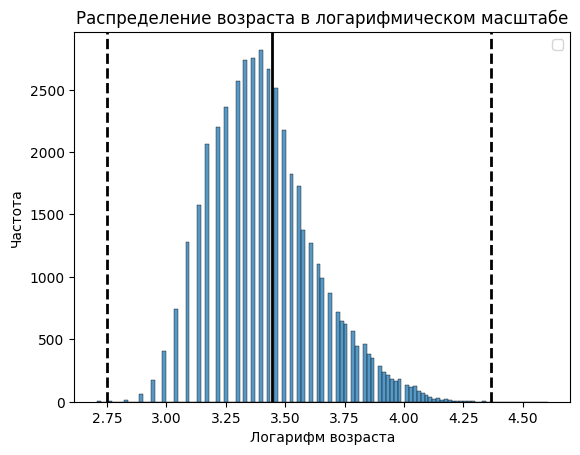

In [ ]:
# ваш код здесь
# Вычисляем логарифм возраста
log_age = np.log(dst['Возраст'])

# Создаем гистограмму
ax = sns.histplot(log_age)
ax.set_title('Распределение возраста в логарифмическом масштабе')

# Добавляем линии статистик
ax.axvline(log_age.mean(), color='k', lw=2)
ax.axvline(log_age.mean() - 3*log_age.std(), color='k', lw=2, ls='--')
ax.axvline(log_age.mean() + 4*log_age.std(), color='k', lw=2, ls='--')

# Добавляем легенду для пояснения линий
ax.legend()

# Опционально: добавляем подписи осей
ax.set_xlabel('Логарифм возраста')
ax.set_ylabel('Частота')

Форма распределения (Гистограмма): Гистограмма показывает частоту встречаемости (количество наблюдений) для каждого интервала логарифма возраста.

Асимметрия:\
Распределение явно асимметрично.\
Оно имеет:

1. Резкий подъем: Частота быстро нарастает слева.

2. Ярко выраженную моду (пик): Максимальная частота наблюдается в интервале логарифма возраста около 3.25. Это наиболее часто встречающееся значение логарифма возраста.

3. Длинный "тяжелый" правый хвост: После достижения пика (моды) частота спадает, но делает это медленнее и плавнее, чем росла слева. Значения справа от моды встречаются реже, но они "простираются" дальше по шкале.

Положение среднего относительно моды:скошенность вправо

Это классический признак положительной правосторонней асимметрии распределения.


In [ ]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    dst = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, dst

outliers, cleaned_data = outliers_z_score_mod(dst, 'Возраст', right=4, log_scale=True)
outliers.shape[0]

3